<a href="https://colab.research.google.com/github/felicitasbaronio/FINAL_AnalisisPredictivo/blob/main/FINAL_AnalisisPredictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from math import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
datos = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/FINAL_AnalisisPredictivo.csv',sep=',')

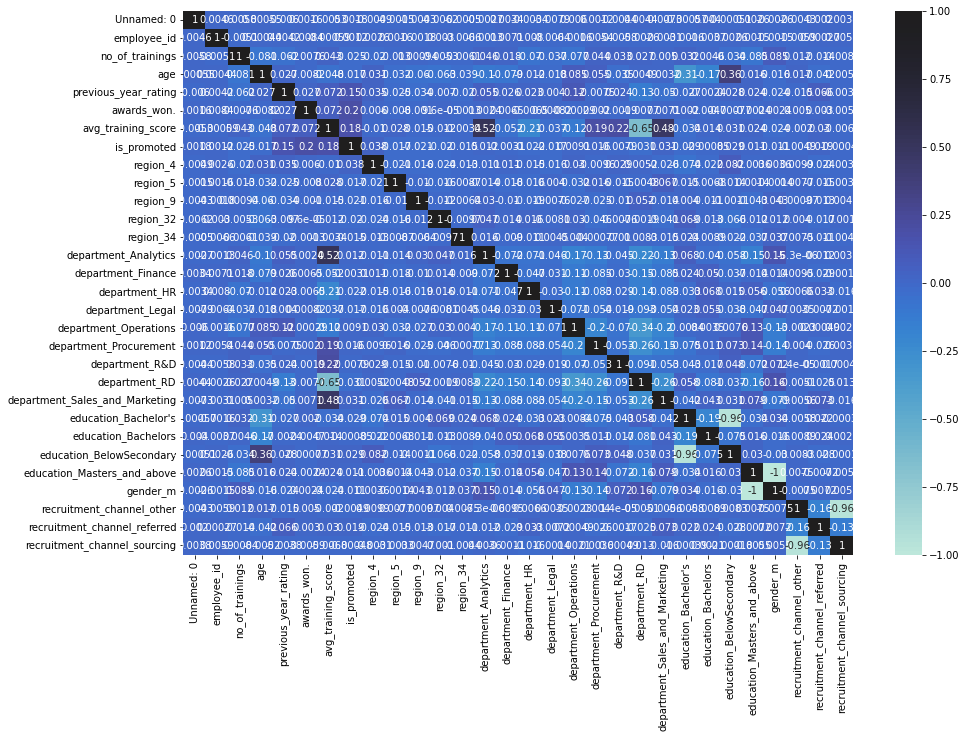

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(datos.corr(), annot=True, center=True)

Text(0.5, 1.0, 'Correlation matrix')

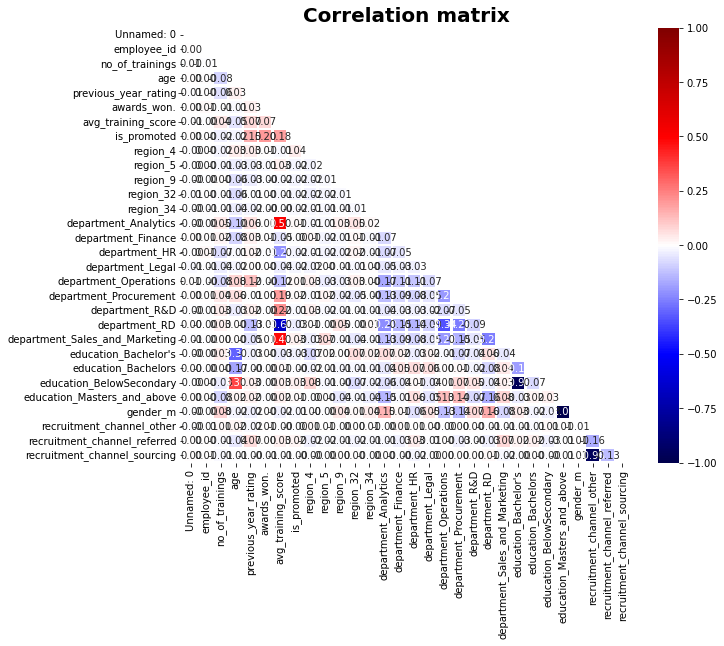

In [ ]:
corr_matrix = datos.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig = plt.figure(figsize=[10,8])
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1.5,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation matrix', weight='bold',fontsize=20)

In [ ]:
x_datos = datos.loc[:, datos.columns != 'is_promoted']

In [ ]:
y_datos = datos.loc[:, datos.columns == 'is_promoted']

In [ ]:
x_datos.head()

,Unnamed: 0,employee_id,no_of_trainings,age,previous_year_rating,awards_won.,avg_training_score,region_4,region_5,region_9,region_32,region_34,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_RD,department_Sales_and_Marketing,education_Bachelor's,education_Bachelors,education_BelowSecondary,education_Masters_and_above,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,65438,1,35,5,0,49,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,2,65141,1,30,5,0,60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,3,7513,1,34,3,0,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,4,2542,2,39,1,0,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,5,48945,1,45,3,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0


In [ ]:
y_datos.head()

,is_promoted
0,1
1,1
2,1
3,1
4,1


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
x_datos, y_datos = sm.fit_resample(x_datos, y_datos)

In [ ]:
y_datos.value_counts()

is_promoted
1              50140
2              50140
dtype: int64

In [ ]:
x_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100280 entries, 0 to 100279
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Unnamed: 0                      100280 non-null  int64
 1   employee_id                     100280 non-null  int64
 2   no_of_trainings                 100280 non-null  int64
 3   age                             100280 non-null  int64
 4   previous_year_rating            100280 non-null  int64
 5   awards_won.                     100280 non-null  int64
 6   avg_training_score              100280 non-null  int64
 7   region_4                        100280 non-null  int64
 8   region_5                        100280 non-null  int64
 9   region_9                        100280 non-null  int64
 10  region_32                       100280 non-null  int64
 11  region_34                       100280 non-null  int64
 12  department_Analytics            100280 non-n

In [ ]:
datos_cor = pd.concat([y_datos, x_datos], axis=1,)
datos_cor

,is_promoted,Unnamed: 0,employee_id,no_of_trainings,age,previous_year_rating,awards_won.,avg_training_score,region_4,region_5,region_9,region_32,region_34,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_RD,department_Sales_and_Marketing,education_Bachelor's,education_Bachelors,education_BelowSecondary,education_Masters_and_above,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,1,65438,1,35,5,0,49,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,1,2,65141,1,30,5,0,60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,1,3,7513,1,34,3,0,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,1,4,2542,2,39,1,0,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,1,5,48945,1,45,3,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100275,2,43236,7621,1,46,4,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
100276,2,13607,35332,1,39,3,0,62,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
100277,2,40039,65476,1,40,4,0,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100278,2,9401,72899,1,31,2,0,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
datos_cor.info()

Particion de la base

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x_datos,y_datos,test_size = 0.3,random_state = 0 )

In [ ]:
print("Training: {}".format(len(x_train)))
print("Testing: {}".format(len(x_test)))

Training: 70196
Testing: 30084


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=18, random_state= 42)

In [ ]:
random_forest_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=18, random_state=42)

In [ ]:
random_forest_model.score(x_test, y_test)

0.9615410184815849

In [ ]:
random_forest_model.score(x_train, y_train)

0.9728759473474272

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


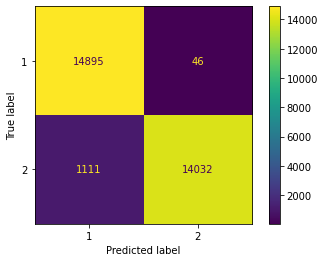

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest_model, x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
y_pred = random_forest_model.predict(x_test)

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, random_forest_model.predict_proba(x_test)[:,1])

Accuracy Score: 0.9615410184815849
Precision: 0.9305885293015119
Recall: 0.9969212234790175


0.9803149934482441

XG BOOST

In [ ]:
import xgboost as xgb
XGboost = xgb.XGBClassifier(max_depth = 22, n_estimators = 160, colsample_bytree = 0.3)
XGboost.fit(x_train,y_train)

In [ ]:
XGboost.score(x_test,y_test)

0.9638678367238399

In [ ]:
XGboost.score(x_train,y_train)

0.9984044674910252

In [ ]:
xgb.plot_importance(XGboost)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


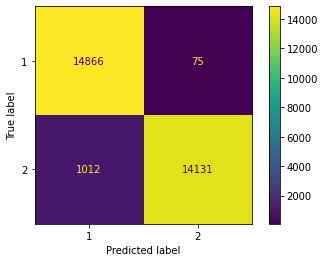

In [ ]:
plot_confusion_matrix(XGboost, x_test,y_test)

In [ ]:
y_pred = XGboost.predict(x_test)

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Score: 0.9638678367238399
Precision: 0.9362640130998866
Recall: 0.9949802556723111


In [ ]:
roc_auc_score(y_test, XGboost.predict_proba(x_test)[:,1])

0.9870964803014421

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
modeloNB = GaussianNB()
modeloNB.fit(x_train, y_train)

In [ ]:
modeloNB.score(x_test, y_test)

0.6992088817976333

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


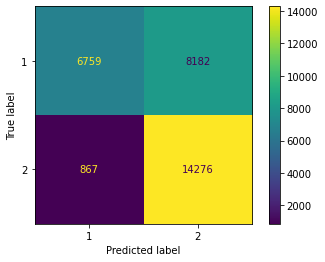

In [ ]:
plot_confusion_matrix(modeloNB, x_test,y_test)

In [ ]:
y_pred = modeloNB.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6992088817976333
Precision: 0.8863099921321794
Recall: 0.4523793588113245


In [ ]:
y_pred_xb_proba = modeloNB.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xb_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for NB Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

REGRESION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=42)
classifier_logreg.fit(x_train, y_train)

In [ ]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([2, 2, 2, ..., 1, 2, 2])

In [ ]:
roc_auc_score(y_test, classifier_logreg.decision_function(x_test))

0.9743160271560202

In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Score: 0.9579178300757878
Precision: 0.9233483994799083
Recall: 0.9981259621176628


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.205139


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


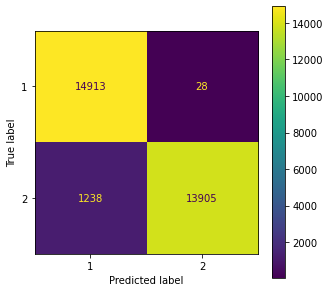

In [ ]:
plot_confusion_matrix(classifier_logreg, x_test,y_test)